In [1]:
import numpy as np
import statsmodels.api as sm
from scipy.stats import t
import pandas as pd
from scipy.stats import t
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from scipy.stats import t
import nolds


In [57]:
import random
random.seed(42)

In [561]:
################ futher help func ####################
# 假设你有一个方差-协方差矩阵V
def invsqrtmatrix(V):
    eigenvalues, eigenvectors = np.linalg.eig(V)
    D_sqrt = np.diag(np.sqrt(eigenvalues))
    V_sqrt = eigenvectors @ D_sqrt @ np.linalg.inv(eigenvectors)
    return np.linalg.inv(V_sqrt)
# invsqrtmatrix(Dm)


import numpy as np
from scipy.stats import norm
from scipy.optimize import brentq

def equation(a, alpha, k=1):
    return  1 - (1 - 2 * (1 + a * norm.pdf(a) - norm.cdf(a))) ** k  - (alpha)

def solve_for_a(alpha):
    a_low = -10
    a_high = 10
    a = brentq(equation, a_low, a_high, args=(alpha,))
    return a

alpha = 0.05
a = solve_for_a(alpha)
print(a)

2.795483482915183


In [562]:
np.random.seed(47)
ar_param = 0.5
ma_param = 0.2
N = 2

In [563]:
IBM = pd.read_csv('K线导出_IBM_日线数据.csv')
SPX = pd.read_csv('K线导出_SPX_日线数据.csv')
ALL = SPX.merge(IBM, on='交易时间', how='left').set_index('交易时间')

In [625]:
m = len(ALL['涨跌幅%_y'].loc['2015-01-20':].iloc[:600].fillna(0).values)
m

600

In [626]:
ALL['涨跌幅%_y'].loc['2015-01-20':].iloc[:600]

交易时间
2015-01-20   -0.12
2015-01-21   -3.36
2015-01-22    2.45
2015-01-23    0.31
2015-01-26    0.31
              ... 
2017-05-31    0.59
2017-06-01    0.03
2017-06-02   -0.41
2017-06-05    0.24
2017-06-06   -0.03
Name: 涨跌幅%_y, Length: 600, dtype: float64

In [627]:
from tqdm import tqdm
countfail = 0
serx = 0
sery = 1
q = 3
n_samples = q * m + 5
selected_lag_order = 1# see
hurst = 0.7
n_samples 

1805

In [628]:
bondtable = np.full(q*m, np.nan, dtype=np.float32)
def bondary_func(m, n, a=2.795):
    part1 = np.sqrt(m)
    part2 = (n - m) / m
    part3 = (n / (n - m)) * (a**2 + np.log(n / (n - m)))
    part4 = np.sqrt(part3)
    result = part1 * part2 * part4
    return result

for n in range(m+1, q*m):
    bondtable[n] = bondary_func(m, n, a)

## see laggers

In [629]:
df = np.stack((ALL['涨跌幅%_x'].loc['2015-01-20':].iloc[:n_samples].fillna(0).values, ALL['涨跌幅%_y'].loc['2015-01-20':].iloc[:n_samples].fillna(0).values), axis=-1)

In [630]:
#选择VAR模型的最佳滞后阶数
model = VAR(df)
data = pd.DataFrame(columns=['Lag Order', 'AIC', 'BIC', 'FPE', 'HQIC'])

for i in [1, 2, 3, 4, 5]:  # 测试1到5滞后阶数
    result = model.fit(i)
    print('Lag Order=', i)
    print('AIC:', result.aic)
    print('BIC:', result.bic)
    print('FPE:', result.fpe)
    print('HQIC:', result.hqic, '\n')
    
    new_row = pd.DataFrame({
        'Lag Order': [i],
        'AIC': [result.aic],
        'BIC': [result.bic],
        'FPE': [result.fpe],
        'HQIC': [result.hqic]
    })
    data = pd.concat([data, new_row], ignore_index=True)


Lag Order= 1
AIC: 0.5161734386820342
BIC: 0.5344586771541715
FPE: 1.6756035769459634
HQIC: 0.5229224710728317 

Lag Order= 2
AIC: 0.5058147335427543
BIC: 0.5363039582970711
FPE: 1.6583361193953485
HQIC: 0.5170685392105934 

Lag Order= 3
AIC: 0.5091863118248041
BIC: 0.5518906037972547
FPE: 1.6639368483775059
HQIC: 0.5249492331461638 

Lag Order= 4
AIC: 0.5035243083334892
BIC: 0.5584547648649535
FPE: 1.6545423993321449
HQIC: 0.5238006942973126 

Lag Order= 5
AIC: 0.5022370295765687
BIC: 0.5694047644462651
FPE: 1.652414140210836
HQIC: 0.5270312357979687 



<Figure size 1000x600 with 0 Axes>

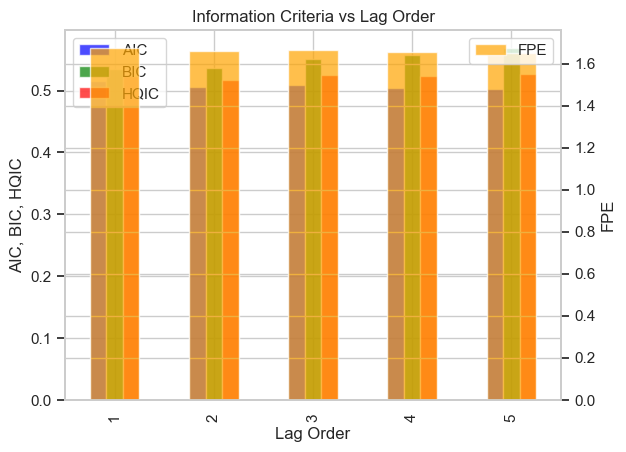

In [631]:

plt.figure(figsize=(10, 6))

# 绘制AIC, BIC, HQIC的柱状图
ax1 = data.plot.bar(x='Lag Order', y=['AIC', 'BIC', 'HQIC'], color=['blue', 'green', 'red'], alpha=0.7)

# 绘制FPE的柱状图，使用次坐标轴
ax2 = ax1.twinx()
data.plot.bar(x='Lag Order', y='FPE', color='orange', alpha=0.7, ax=ax2)

# 设置标题和坐标轴标签
plt.title('Information Criteria vs Lag Order')
ax1.set_xlabel('Lag Order')
ax1.set_ylabel('AIC, BIC, HQIC')
ax2.set_ylabel('FPE')

# 显示图例
ax1.legend(['AIC', 'BIC', 'HQIC'], loc='upper left')
ax2.legend(['FPE'], loc='upper right')

# 显示图表
plt.show()

In [632]:
hit = 0
countfail = 0

In [633]:
## update way
for _ in (range(1)):
    
    df = (np.array(series_list, dtype=np.float32).T)
    model_VAR = VAR(df)
    
    results = model_VAR.fit(selected_lag_order)
    residuals = results.resid
    
    y = residuals[:m, sery]
    x = residuals[:m, serx]
    x_with_const = sm.add_constant(x)
    model = sm.OLS(y, x_with_const).fit() 
    beta_m = model.params[1]
    Dm = model.cov_params()[1][1] * m


    for n in tqdm(range(m+1, q*m)):
        y = residuals[:n, sery]
        x = residuals[:n, serx]
        x_with_const = sm.add_constant(x)
        model_n = sm.OLS(y, x_with_const).fit()
        beta_n = model_n.params[1]
        Zn = n * (Dm)**(-1/2) * (beta_n - beta_m)
        if(np.abs(Zn)>bondtable[n]):
            countfail += 1
            hit += n
            break
    

 25%|███████████████████▎                                                         | 301/1199 [00:00<00:00, 1765.87it/s]


In [634]:
hit

902

In [641]:
ALL['涨跌幅%_x'].loc['2019-11-17':].iloc[:hit]

交易时间
2019-11-18    0.05
2019-11-19   -0.06
2019-11-20   -0.38
2019-11-21   -0.16
2019-11-22    0.22
              ... 
2023-06-09    0.11
2023-06-12    0.93
2023-06-13    0.69
2023-06-14    0.08
2023-06-15    1.22
Name: 涨跌幅%_x, Length: 902, dtype: float64

In [42]:
from tqdm import tqdm
countfail = 0
serx = 0
sery = 1
m = 200
q = 3
n_samples = q * m + 5
selected_lag_order = 2 #

np.random.seed(47)
ar_param = 0.5
ma_param = 0.2
N = 2
hit = 0

In [43]:
bondtable = np.full(q*m, np.nan, dtype=np.float32)
def bondary_func(m, n, a=2.795):
    part1 = np.sqrt(m)
    part2 = (n - m) / m
    part3 = (n / (n - m)) * (a**2 + np.log(n / (n - m)))
    part4 = np.sqrt(part3)
    result = part1 * part2 * part4
    return result

for n in range(m+1, q*m):
    bondtable[n] = bondary_func(m, n, a)

In [44]:
## update way
for _ in tqdm(range(3000)):
    
    f_t = np.random.normal(size=n_samples)
    alphas = np.random.uniform(low=0.1, high=1.0, size=N)
    u_it = np.random.normal(size=(n_samples, N))
    correlated_errors = f_t[:, np.newaxis] * alphas[np.newaxis,:] + u_it
    series_list=[]

    for i in range(N):
        arma_model = sm.tsa.ArmaProcess(ar=np.r_[1,-ar_param], ma=np.r_[1, ma_param])
        series = arma_model.generate_sample(nsample=n_samples, scale=1, distrvs=lambda size: correlated_errors[:size[0], i])
        series_list.append(series)
    df = (np.array(series_list, dtype=np.float32).T)
#     model_VAR = VAR(df)
#     results = model_VAR.fit(selected_lag_order)
#     residuals = results.resid
    
    y = residuals[:m, sery]
    x = residuals[:m, serx]
    x_with_const = sm.add_constant(x)
    model = sm.OLS(y, x_with_const).fit() 
    beta_m = model.params[1]
    Dm = model.cov_params()[1][1] * m


    for n in range(m+1, q*m):
        y = df[:n, sery]
        x = df[:n, serx]
        x_with_const = sm.add_constant(x)
        model_n = sm.OLS(y, x_with_const).fit()
        beta_n = model_n.params[1]
        Zn = n * (Dm)**(-1/2) * (beta_n - beta_m)
        if(np.abs(Zn)>bondtable[n]):
            countfail += 1
            break

100%|█████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:29<00:00, 100.64it/s]


In [45]:
countfail

2734

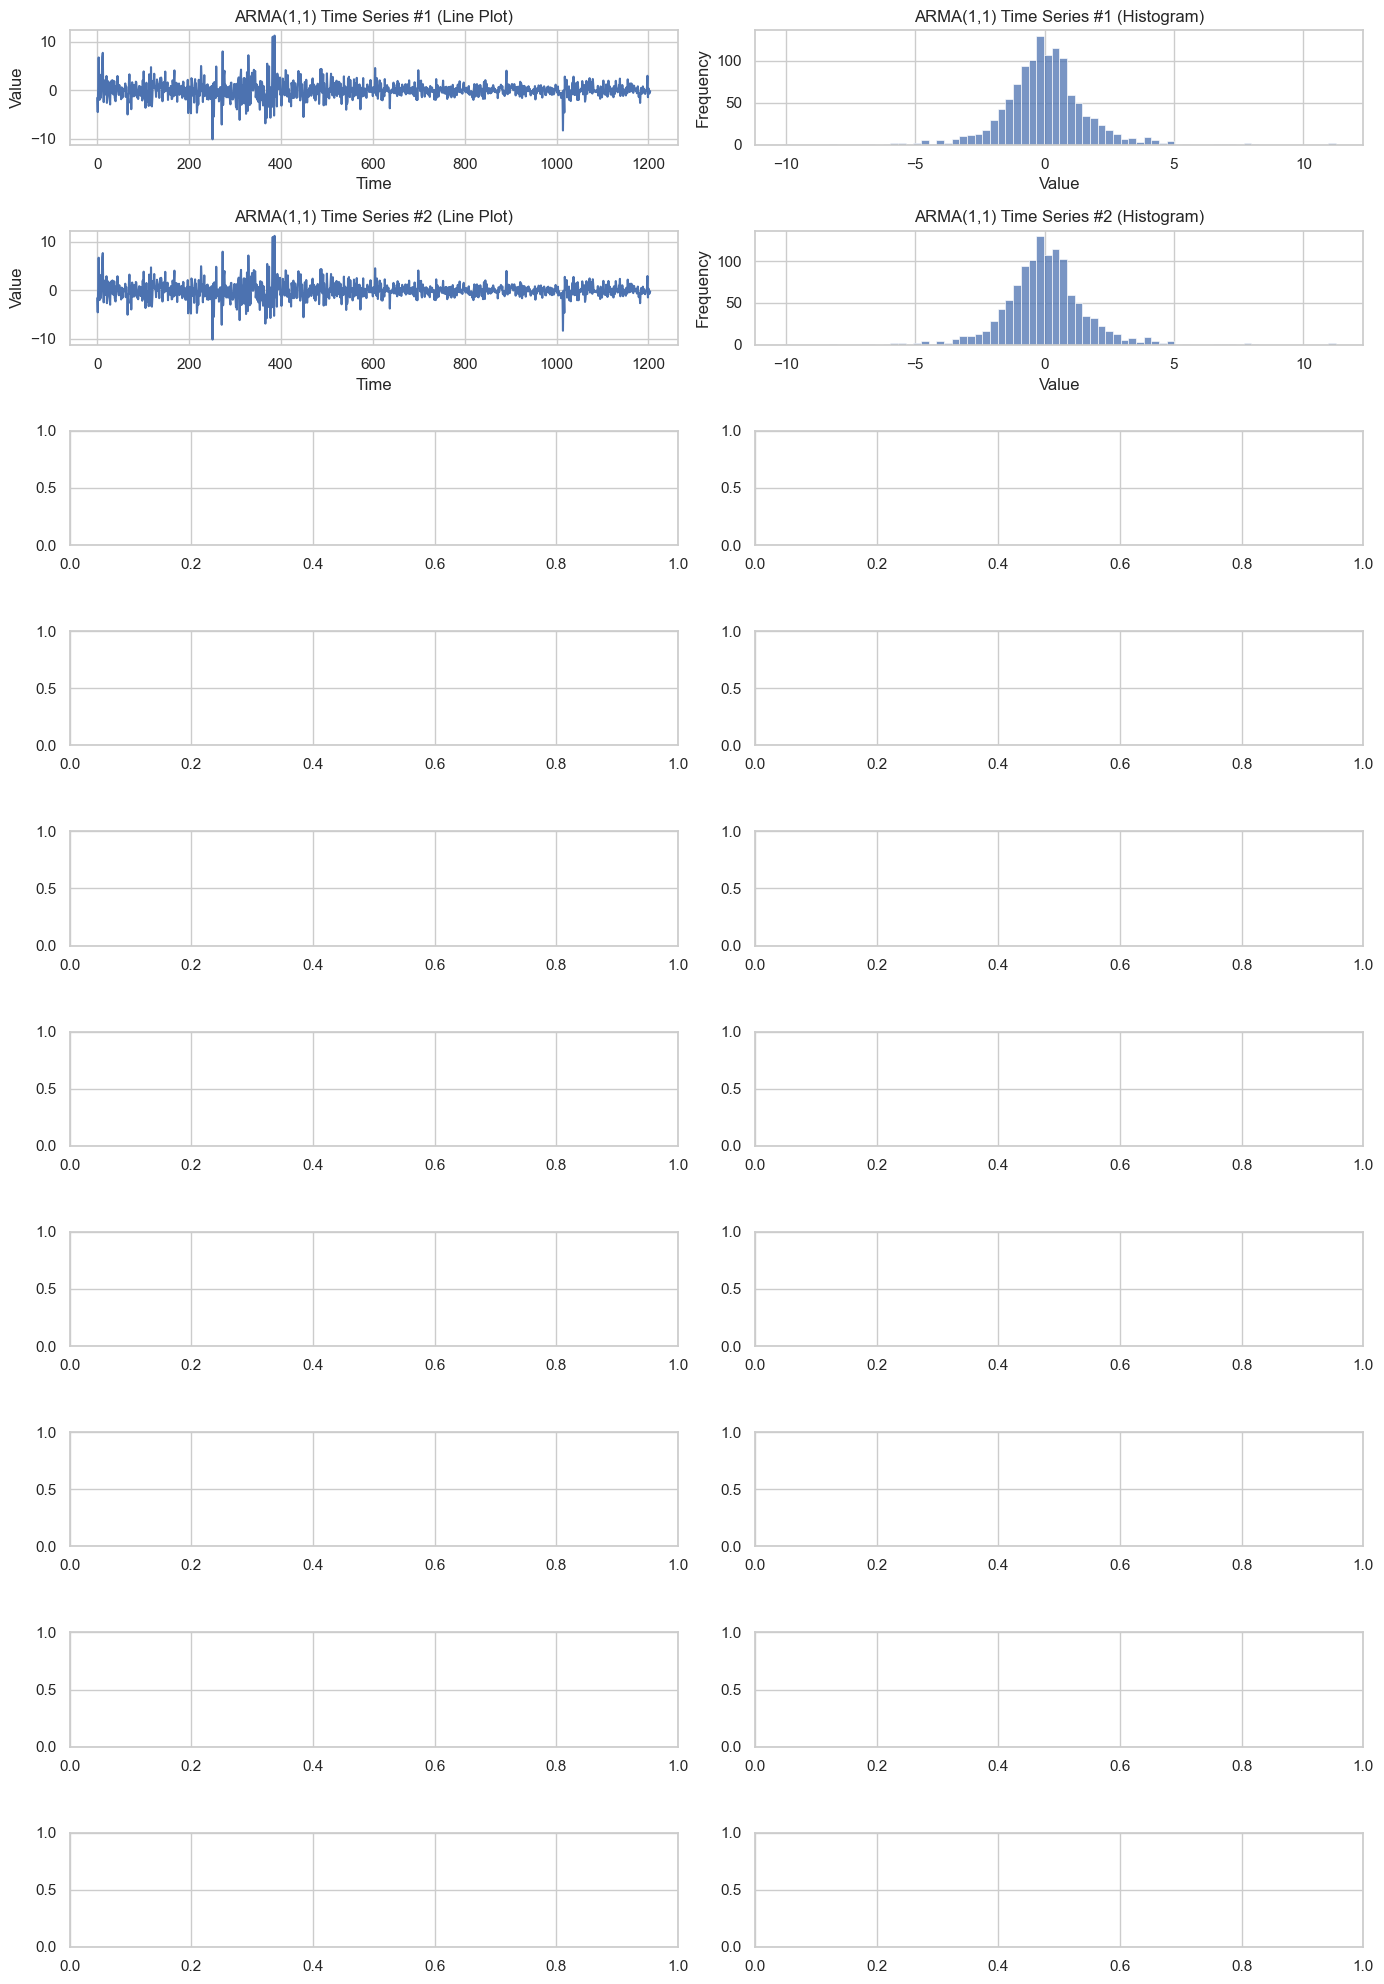

In [311]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


fig, axs = plt.subplots(10, 2, figsize=(14, 20))


for i, series in enumerate(df.T):
    #绘制时间序列线图
    axs[i, 0].plot(series)
    axs[i, 0].set_title(f"ARMA(1,1) Time Series #{i+1} (Line Plot)")
    axs[i, 0].set_xlabel("Time")
    axs[i, 0].set_ylabel("Value")

    #绘制时间序列直方图
    sns.histplot(series, kde=False, ax=axs[i, 1])

    axs[i, 1].set_title(f"ARMA(1,1) Time Series #{i+1} (Histogram)")
    axs[i, 1].set_xlabel("Value")
    axs[i, 1].set_ylabel("Frequency")


plt.tight_layout()
plt.show()